# SUPERVISED LEARNING: UNLINEAR REGRESSION MODELS

# KNN

In [1]:
import pandas as pd

df = pd.read_csv("dataset_hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [2]:
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [4]:
y_pred = knn_model.predict(X_test)

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [6]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


In [7]:
from sklearn.model_selection import GridSearchCV

knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()

knn_cv_model = GridSearchCV(knn, knn_params, cv = 5)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [8]:
knn_cv_model.best_params_["n_neighbors"]

7

In [9]:
from sklearn.model_selection import cross_val_score

RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=5, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  312.57423176854286
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  300.85667977336925
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  285.33670183535077
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  291.0181553896766
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  288.419452065942
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  293.3963398729708
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  289.5230298284862
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  298.0004605806818
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  303.77187737702144
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  299.7278969468424


In [10]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [11]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [12]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

414.9361222421057

### LINEAR SUPPORT VECTOR REGRESSION (DOĞRUSAL DESTEK VEKTÖR REGRESYONU)

In [13]:
import pandas as pd
df = pd.read_csv("dataset_hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [15]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [16]:
from sklearn.svm import SVR

svr_model = SVR(kernel = "linear").fit(X_train, y_train)

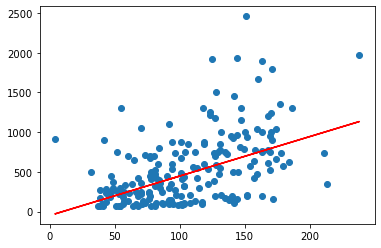

In [17]:
import matplotlib.pyplot as plt

y_pred = svr_model.predict(X_train)

plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [18]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [19]:
y_pred = svr_model.predict(X_test)

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [21]:
from sklearn.model_selection import GridSearchCV

svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5).fit(X_train,y_train)

In [22]:
svr_tuned = SVR(kernel = "linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)


In [23]:
y_pred = svr_tuned.predict(X_test)

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.1989667811154

### UNLINEAR SUPPORT VECTOR REGRESSION(DOĞRUSAL OLMAYAN DESTEK VEKTÖR REGRESYONU)

In [25]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [26]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel = 'rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

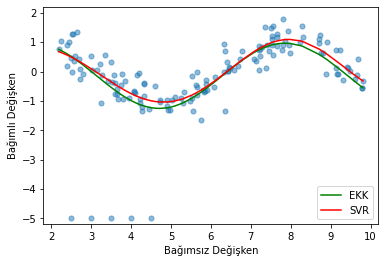

In [27]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [28]:
df = pd.read_csv("dataset_hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [30]:
svr_rbf = SVR(kernel = "rbf").fit(X_train, y_train)

In [31]:
y_pred = svr_rbf.predict(X_test)

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

In [33]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 5)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [34]:
svr_tuned = SVR(kernel = "rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [35]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

# CART (CLASSIFICATION AND REGRESSION TREES)

In [36]:
df = pd.read_csv("dataset_hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [38]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [39]:
from sklearn.tree import DecisionTreeRegressor

cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [40]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


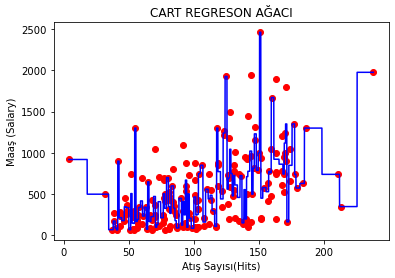

In [41]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [42]:
from skompiler import skompile

print(skompile(cart_model.predict).to('python/code'))

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else 

In [43]:
y_pred =cart_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [44]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [45]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 5)

In [46]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [47]:
cart_cv_model.best_params_

{'max_leaf_nodes': 3, 'min_samples_split': 64}

In [48]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

In [49]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [50]:
y_pred = cart_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

423.406689243066

#### Değişkenlerin önem düzeylerini görselleştirmek için

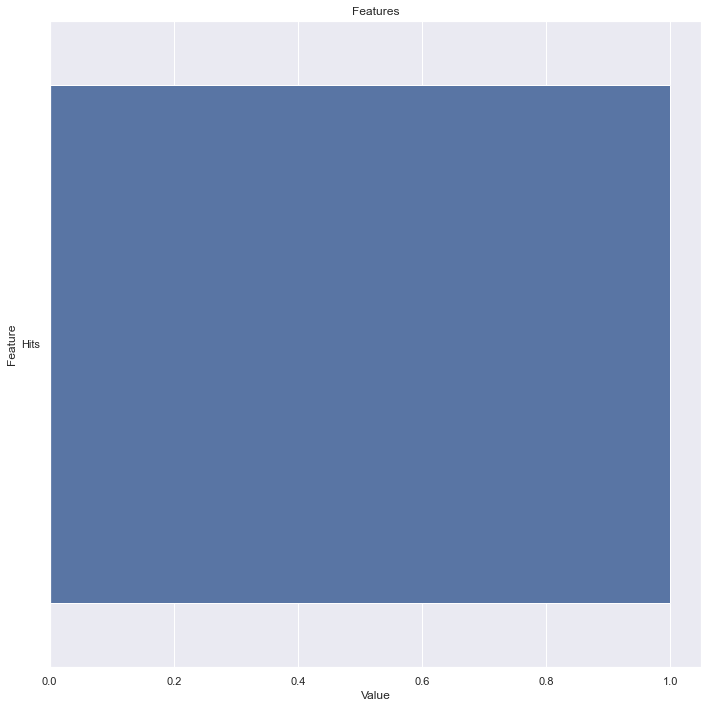

In [51]:
import seaborn as sns

def plot_importance(model, features, num=len(X_train), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(cart_tuned, X_train)


# Bagged Trees Regresyon

In [52]:
import pandas as pd

df = pd.read_csv("dataset_hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [54]:
from sklearn.ensemble import BaggingRegressor

bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [55]:
y_pred = bag_model.predict(X_test)

In [56]:
import numpy as np
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

323.6941383055772

In [57]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=1734371943)

In [58]:
bag_model.estimators_[4]

DecisionTreeRegressor(random_state=1369728180)

In [59]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

np.sqrt(mean_squared_error(y_test, iki_y_pred))

508.4617817718814

In [60]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

np.sqrt(mean_squared_error(y_test, yedi_y_pred))

520.1549516426171

In [61]:
bag_params = {"n_estimators": range(2,20)}

In [62]:
from sklearn.model_selection import GridSearchCV

bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 5)

In [63]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [64]:
bag_cv_model.best_params_

{'n_estimators': 19}

In [65]:
bag_tuned = BaggingRegressor(n_estimators = 14)

In [66]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=14)

In [67]:
y_pred = bag_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

349.18806285215203

# RANDOM FOREST

In [68]:
import pandas as pd

df = pd.read_csv("dataset_hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])


y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 42)

In [71]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [72]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

In [73]:
from sklearn.model_selection import GridSearchCV

rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10],
            'n_estimators' : [100, 200, 500]}

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5).fit(X_train, y_train)

In [74]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 3, 'n_estimators': 500}

In [75]:
rf_final = rf_model.set_params(**rf_cv_model.best_params_,
                               random_state=42).fit(X, y)

In [76]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(rf_final, X, y, cv=5)

In [77]:
cv_results['test_score'].mean()

0.5987406747327657

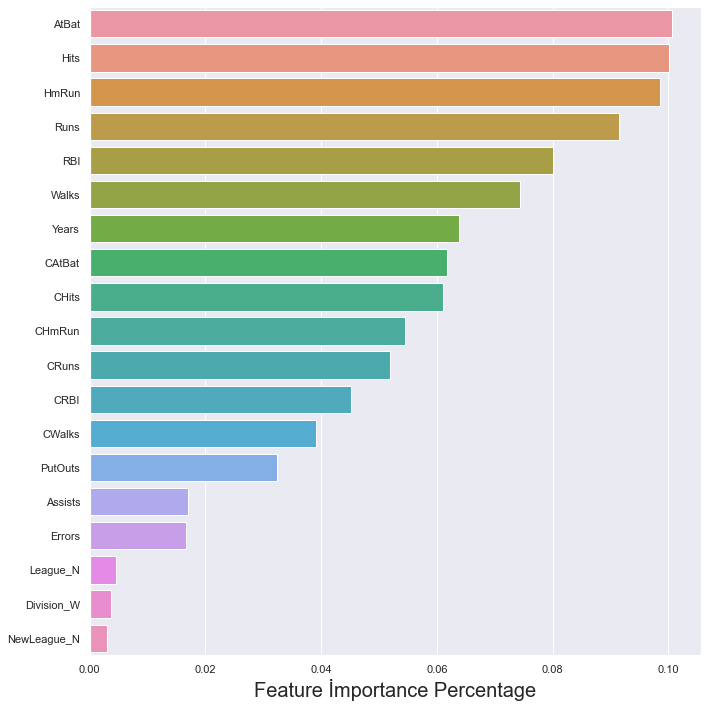

In [78]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_importance(model, features, num=len(X), save=False):
    df_feature_importance = pd.DataFrame({'Feature İmportance Percentage': model.feature_importances_}, index = features.columns)
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x = "Feature İmportance Percentage", y = features.columns, 
                data=df_feature_importance.sort_values(by= "Feature İmportance Percentage",ascending=False)[0:num])
    

    plt.xlabel(xlabel="Feature İmportance Percentage", fontsize= 20)
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('feature_importance.png')

plot_importance(rf_final, X)

# GRADIENT BOOSTING MACHINES

In [79]:
import pandas as pd

df = pd.read_csv("dataset_hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [81]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [82]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

350.3860338883814

In [83]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 8],
    'n_estimators': [200, 500, 1000],
    'subsample': [1,0.5,0.75],
}

In [84]:
from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 5, verbose = 1)
gbm_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [200, 500, 1000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=1)

In [85]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}

In [86]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [87]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.334415557723

Text(0.5, 0, 'Değişken Önem Düzeyleri')

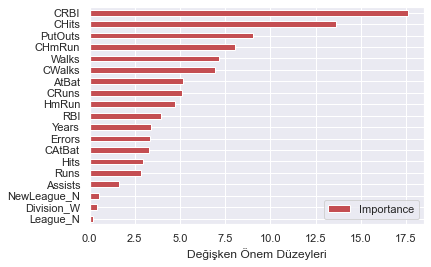

In [88]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# eXtreme Gradient Boosting (XGBOOST)

In [90]:
df = pd.read_csv("dataset_hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [92]:
import xgboost as xgb

DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [93]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor().fit(X_train, y_train)

In [94]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

In [95]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 5, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [96]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [97]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.1, 
                         max_depth = 2, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [98]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

367.8515299923177

# LightGBM

In [101]:
import pandas as pd

df = pd.read_csv("dataset_hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])


y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [103]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [104]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

In [105]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

from sklearn.model_selection import GridSearchCV

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=3, n_jobs = -1, verbose = 2)

lgbm_cv_model.fit(X_train, y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [106]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 500}

In [107]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.01, 
                           max_depth = 5, 
                           n_estimators = 500,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [108]:
y_pred = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

370.01474021657657

# CatBOOST

In [109]:
import pandas as pd

df = pd.read_csv("dataset_hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [111]:
from catboost import CatBoostRegressor

catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 163ms	remaining: 2m 42s
1:	learn: 431.3923642	total: 165ms	remaining: 1m 22s
2:	learn: 424.8820360	total: 167ms	remaining: 55.4s
3:	learn: 418.2514904	total: 168ms	remaining: 41.9s
4:	learn: 412.6394021	total: 170ms	remaining: 33.8s
5:	learn: 406.6247020	total: 171ms	remaining: 28.4s
6:	learn: 400.5321206	total: 173ms	remaining: 24.5s
7:	learn: 394.6683437	total: 174ms	remaining: 21.6s
8:	learn: 388.2496484	total: 176ms	remaining: 19.4s
9:	learn: 382.9448842	total: 178ms	remaining: 17.6s
10:	learn: 377.2600080	total: 179ms	remaining: 16.1s
11:	learn: 372.4829606	total: 181ms	remaining: 14.9s
12:	learn: 366.6823437	total: 183ms	remaining: 13.9s
13:	learn: 362.6076230	total: 184ms	remaining: 13s
14:	learn: 358.0107745	total: 186ms	remaining: 12.2s
15:	learn: 353.2802665	total: 188ms	remaining: 11.5s
16:	learn: 348.5646265	total: 189ms	remaining: 10.9s
17:	learn: 343.6407912	total: 190ms	remaining: 10.4s
18:	learn: 339.2363847	tot

234:	learn: 113.8912592	total: 492ms	remaining: 1.6s
235:	learn: 113.4606970	total: 494ms	remaining: 1.6s
236:	learn: 113.0958922	total: 496ms	remaining: 1.59s
237:	learn: 113.0091361	total: 497ms	remaining: 1.59s
238:	learn: 112.7657197	total: 498ms	remaining: 1.59s
239:	learn: 112.2315070	total: 500ms	remaining: 1.58s
240:	learn: 111.9507125	total: 501ms	remaining: 1.58s
241:	learn: 111.7384492	total: 502ms	remaining: 1.57s
242:	learn: 111.0693763	total: 503ms	remaining: 1.57s
243:	learn: 110.3499926	total: 505ms	remaining: 1.56s
244:	learn: 110.2316231	total: 506ms	remaining: 1.56s
245:	learn: 109.6985998	total: 507ms	remaining: 1.55s
246:	learn: 109.4279824	total: 509ms	remaining: 1.55s
247:	learn: 109.1466762	total: 510ms	remaining: 1.55s
248:	learn: 108.9628542	total: 511ms	remaining: 1.54s
249:	learn: 108.7268676	total: 513ms	remaining: 1.54s
250:	learn: 108.0921190	total: 514ms	remaining: 1.53s
251:	learn: 107.6167844	total: 516ms	remaining: 1.53s
252:	learn: 106.9716563	total:

461:	learn: 54.4030407	total: 811ms	remaining: 945ms
462:	learn: 54.3308204	total: 813ms	remaining: 943ms
463:	learn: 54.0283724	total: 815ms	remaining: 941ms
464:	learn: 53.9962714	total: 816ms	remaining: 939ms
465:	learn: 53.8149476	total: 818ms	remaining: 937ms
466:	learn: 53.7806209	total: 819ms	remaining: 935ms
467:	learn: 53.7585727	total: 821ms	remaining: 933ms
468:	learn: 53.5042777	total: 822ms	remaining: 931ms
469:	learn: 53.3257034	total: 824ms	remaining: 929ms
470:	learn: 53.0801119	total: 826ms	remaining: 927ms
471:	learn: 53.0136550	total: 827ms	remaining: 925ms
472:	learn: 52.9408930	total: 829ms	remaining: 924ms
473:	learn: 52.7089062	total: 831ms	remaining: 922ms
474:	learn: 52.6819781	total: 833ms	remaining: 920ms
475:	learn: 52.5065568	total: 834ms	remaining: 918ms
476:	learn: 52.3688770	total: 836ms	remaining: 916ms
477:	learn: 52.2402473	total: 837ms	remaining: 914ms
478:	learn: 52.1406517	total: 838ms	remaining: 912ms
479:	learn: 52.1107144	total: 839ms	remaining:

681:	learn: 27.4149358	total: 1.14s	remaining: 532ms
682:	learn: 27.3480578	total: 1.14s	remaining: 531ms
683:	learn: 27.2546632	total: 1.15s	remaining: 529ms
684:	learn: 27.1581242	total: 1.15s	remaining: 527ms
685:	learn: 27.1291330	total: 1.15s	remaining: 526ms
686:	learn: 27.0589760	total: 1.15s	remaining: 524ms
687:	learn: 26.9207571	total: 1.15s	remaining: 522ms
688:	learn: 26.8046340	total: 1.15s	remaining: 520ms
689:	learn: 26.7346039	total: 1.15s	remaining: 519ms
690:	learn: 26.6359238	total: 1.16s	remaining: 517ms
691:	learn: 26.5458163	total: 1.16s	remaining: 515ms
692:	learn: 26.5287024	total: 1.16s	remaining: 513ms
693:	learn: 26.4436127	total: 1.16s	remaining: 512ms
694:	learn: 26.3860996	total: 1.16s	remaining: 510ms
695:	learn: 26.3271824	total: 1.16s	remaining: 508ms
696:	learn: 26.1929180	total: 1.17s	remaining: 507ms
697:	learn: 26.0989501	total: 1.17s	remaining: 505ms
698:	learn: 26.0348052	total: 1.17s	remaining: 503ms
699:	learn: 25.9715846	total: 1.17s	remaining:

900:	learn: 15.2150872	total: 1.46s	remaining: 161ms
901:	learn: 15.1938758	total: 1.46s	remaining: 159ms
902:	learn: 15.1087389	total: 1.47s	remaining: 157ms
903:	learn: 15.0270836	total: 1.47s	remaining: 156ms
904:	learn: 14.9579009	total: 1.47s	remaining: 154ms
905:	learn: 14.9321713	total: 1.47s	remaining: 152ms
906:	learn: 14.9254894	total: 1.47s	remaining: 151ms
907:	learn: 14.8662999	total: 1.47s	remaining: 149ms
908:	learn: 14.7969088	total: 1.47s	remaining: 148ms
909:	learn: 14.7187437	total: 1.48s	remaining: 146ms
910:	learn: 14.6594229	total: 1.48s	remaining: 144ms
911:	learn: 14.6109629	total: 1.48s	remaining: 143ms
912:	learn: 14.5833869	total: 1.48s	remaining: 141ms
913:	learn: 14.5677206	total: 1.48s	remaining: 139ms
914:	learn: 14.5260964	total: 1.48s	remaining: 138ms
915:	learn: 14.4838792	total: 1.48s	remaining: 136ms
916:	learn: 14.4614097	total: 1.49s	remaining: 134ms
917:	learn: 14.4432212	total: 1.49s	remaining: 133ms
918:	learn: 14.4363977	total: 1.49s	remaining:

In [112]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

In [113]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

from sklearn.model_selection import GridSearchCV

catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 422.4143448	total: 16.9ms	remaining: 16.9s
1:	learn: 404.1864276	total: 18.9ms	remaining: 9.42s
2:	learn: 386.3231718	total: 20.5ms	remaining: 6.8s
3:	learn: 370.5548032	total: 21.9ms	remaining: 5.46s
4:	learn: 354.9242038	total: 23.4ms	remaining: 4.66s
5:	learn: 342.3403984	total: 24.9ms	remaining: 4.12s
6:	learn: 328.2370070	total: 26.4ms	remaining: 3.75s
7:	learn: 317.5056526	total: 27.9ms	remaining: 3.45s
8:	learn: 306.6243511	total: 29.5ms	remaining: 3.25s
9:	learn: 297.3147023	total: 31ms	remaining: 3.07s
10:	learn: 288.3685892	total: 32.4ms	remaining: 2.91s
11:	learn: 281.0996220	total: 34.1ms	remaining: 2.81s
12:	learn: 273.2254898	total: 35.7ms	remaining: 2.71s
13:	learn: 266.9003385	total: 37.2ms	remaining: 2.62s
14:	learn: 261.9092500	total: 38.9ms	remaining: 2.55s
15:	learn: 256.2637350	total: 40.4ms	remaining: 2.48s
16:	learn: 250.3667935	total: 42ms	remaining: 2.43s
17:	learn: 244.8631098	total: 43.7m

196:	learn: 45.5088158	total: 335ms	remaining: 1.36s
197:	learn: 45.4713460	total: 337ms	remaining: 1.36s
198:	learn: 45.0942536	total: 339ms	remaining: 1.36s
199:	learn: 44.7625600	total: 341ms	remaining: 1.36s
200:	learn: 44.3247006	total: 343ms	remaining: 1.36s
201:	learn: 43.8054974	total: 344ms	remaining: 1.36s
202:	learn: 43.3359785	total: 346ms	remaining: 1.36s
203:	learn: 42.8698272	total: 348ms	remaining: 1.36s
204:	learn: 42.4275364	total: 350ms	remaining: 1.36s
205:	learn: 41.9463597	total: 352ms	remaining: 1.36s
206:	learn: 41.7547985	total: 354ms	remaining: 1.35s
207:	learn: 41.6019714	total: 356ms	remaining: 1.35s
208:	learn: 41.4342896	total: 357ms	remaining: 1.35s
209:	learn: 41.0764993	total: 359ms	remaining: 1.35s
210:	learn: 40.7895715	total: 361ms	remaining: 1.35s
211:	learn: 40.4428042	total: 363ms	remaining: 1.35s
212:	learn: 39.9370849	total: 364ms	remaining: 1.35s
213:	learn: 39.4885257	total: 366ms	remaining: 1.34s
214:	learn: 39.1268375	total: 368ms	remaining:

403:	learn: 10.8382558	total: 665ms	remaining: 981ms
404:	learn: 10.7596014	total: 667ms	remaining: 980ms
405:	learn: 10.7064165	total: 668ms	remaining: 978ms
406:	learn: 10.6372130	total: 670ms	remaining: 976ms
407:	learn: 10.5505037	total: 671ms	remaining: 974ms
408:	learn: 10.4676489	total: 673ms	remaining: 972ms
409:	learn: 10.3632792	total: 674ms	remaining: 970ms
410:	learn: 10.3399756	total: 676ms	remaining: 968ms
411:	learn: 10.2905778	total: 677ms	remaining: 966ms
412:	learn: 10.2175164	total: 679ms	remaining: 965ms
413:	learn: 10.1482923	total: 680ms	remaining: 963ms
414:	learn: 10.0590953	total: 682ms	remaining: 961ms
415:	learn: 9.9982795	total: 683ms	remaining: 959ms
416:	learn: 9.9099074	total: 685ms	remaining: 957ms
417:	learn: 9.8641812	total: 686ms	remaining: 955ms
418:	learn: 9.8207799	total: 688ms	remaining: 954ms
419:	learn: 9.7000976	total: 689ms	remaining: 952ms
420:	learn: 9.6211675	total: 691ms	remaining: 950ms
421:	learn: 9.5821946	total: 692ms	remaining: 948ms


633:	learn: 2.6271014	total: 981ms	remaining: 567ms
634:	learn: 2.6089454	total: 983ms	remaining: 565ms
635:	learn: 2.5996271	total: 985ms	remaining: 564ms
636:	learn: 2.5923568	total: 986ms	remaining: 562ms
637:	learn: 2.5837611	total: 988ms	remaining: 560ms
638:	learn: 2.5726721	total: 989ms	remaining: 559ms
639:	learn: 2.5577477	total: 990ms	remaining: 557ms
640:	learn: 2.5500744	total: 992ms	remaining: 555ms
641:	learn: 2.5274442	total: 993ms	remaining: 554ms
642:	learn: 2.5157559	total: 994ms	remaining: 552ms
643:	learn: 2.5053856	total: 996ms	remaining: 550ms
644:	learn: 2.4841922	total: 997ms	remaining: 549ms
645:	learn: 2.4674035	total: 999ms	remaining: 547ms
646:	learn: 2.4484158	total: 1000ms	remaining: 546ms
647:	learn: 2.4263246	total: 1s	remaining: 544ms
648:	learn: 2.4052258	total: 1s	remaining: 542ms
649:	learn: 2.3816894	total: 1s	remaining: 541ms
650:	learn: 2.3659119	total: 1s	remaining: 539ms
651:	learn: 2.3576051	total: 1.01s	remaining: 537ms
652:	learn: 2.3288476	t

892:	learn: 0.5562858	total: 1.31s	remaining: 158ms
893:	learn: 0.5555127	total: 1.32s	remaining: 156ms
894:	learn: 0.5527685	total: 1.32s	remaining: 155ms
895:	learn: 0.5499500	total: 1.32s	remaining: 153ms
896:	learn: 0.5456148	total: 1.32s	remaining: 152ms
897:	learn: 0.5403285	total: 1.32s	remaining: 150ms
898:	learn: 0.5377774	total: 1.32s	remaining: 149ms
899:	learn: 0.5371353	total: 1.32s	remaining: 147ms
900:	learn: 0.5332613	total: 1.32s	remaining: 146ms
901:	learn: 0.5289379	total: 1.33s	remaining: 144ms
902:	learn: 0.5277948	total: 1.33s	remaining: 143ms
903:	learn: 0.5229979	total: 1.33s	remaining: 141ms
904:	learn: 0.5176545	total: 1.33s	remaining: 140ms
905:	learn: 0.5167566	total: 1.33s	remaining: 138ms
906:	learn: 0.5163313	total: 1.33s	remaining: 137ms
907:	learn: 0.5116777	total: 1.33s	remaining: 135ms
908:	learn: 0.5097952	total: 1.34s	remaining: 134ms
909:	learn: 0.5071290	total: 1.34s	remaining: 132ms
910:	learn: 0.5049191	total: 1.34s	remaining: 131ms
911:	learn: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000277B7D078E0>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [114]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}

In [115]:
catb_tuned = CatBoostRegressor(iterations = 1000, 
                               learning_rate = 0.1, 
                               depth = 5)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 422.4143448	total: 15.4ms	remaining: 15.4s
1:	learn: 404.1864276	total: 16.8ms	remaining: 8.4s
2:	learn: 386.3231718	total: 18.1ms	remaining: 6.01s
3:	learn: 370.5548032	total: 19.3ms	remaining: 4.81s
4:	learn: 354.9242038	total: 20.5ms	remaining: 4.08s
5:	learn: 342.3403984	total: 21.7ms	remaining: 3.6s
6:	learn: 328.2370070	total: 22.9ms	remaining: 3.25s
7:	learn: 317.5056526	total: 24.1ms	remaining: 2.99s
8:	learn: 306.6243511	total: 25.3ms	remaining: 2.78s
9:	learn: 297.3147023	total: 26.4ms	remaining: 2.62s
10:	learn: 288.3685892	total: 27.6ms	remaining: 2.48s
11:	learn: 281.0996220	total: 28.7ms	remaining: 2.36s
12:	learn: 273.2254898	total: 29.9ms	remaining: 2.27s
13:	learn: 266.9003385	total: 31.2ms	remaining: 2.19s
14:	learn: 261.9092500	total: 32.3ms	remaining: 2.12s
15:	learn: 256.2637350	total: 33.5ms	remaining: 2.06s
16:	learn: 250.3667935	total: 34.6ms	remaining: 2s
17:	learn: 244.8631098	total: 35.7ms	remaining: 1.95s
18:	learn: 240.1540669	total: 37ms	remainin

155:	learn: 61.7702532	total: 174ms	remaining: 943ms
156:	learn: 61.2433354	total: 175ms	remaining: 942ms
157:	learn: 60.8455422	total: 177ms	remaining: 942ms
158:	learn: 60.6755303	total: 178ms	remaining: 940ms
159:	learn: 59.9631043	total: 179ms	remaining: 938ms
160:	learn: 59.2211911	total: 180ms	remaining: 936ms
161:	learn: 59.1400932	total: 181ms	remaining: 934ms
162:	learn: 58.9164262	total: 182ms	remaining: 933ms
163:	learn: 58.2084420	total: 183ms	remaining: 931ms
164:	learn: 57.9934649	total: 184ms	remaining: 930ms
165:	learn: 57.3736694	total: 185ms	remaining: 928ms
166:	learn: 56.8338370	total: 186ms	remaining: 926ms
167:	learn: 56.5518049	total: 187ms	remaining: 924ms
168:	learn: 55.9777349	total: 187ms	remaining: 922ms
169:	learn: 55.4485860	total: 188ms	remaining: 920ms
170:	learn: 55.0892542	total: 189ms	remaining: 918ms
171:	learn: 54.9915464	total: 190ms	remaining: 916ms
172:	learn: 54.3968112	total: 191ms	remaining: 914ms
173:	learn: 53.7708163	total: 192ms	remaining:

341:	learn: 15.9446333	total: 345ms	remaining: 664ms
342:	learn: 15.8404109	total: 346ms	remaining: 663ms
343:	learn: 15.7616719	total: 348ms	remaining: 663ms
344:	learn: 15.7046860	total: 349ms	remaining: 662ms
345:	learn: 15.5565531	total: 350ms	remaining: 661ms
346:	learn: 15.4739767	total: 351ms	remaining: 660ms
347:	learn: 15.4214691	total: 352ms	remaining: 659ms
348:	learn: 15.3830392	total: 353ms	remaining: 658ms
349:	learn: 15.2925503	total: 353ms	remaining: 656ms
350:	learn: 15.2685305	total: 354ms	remaining: 655ms
351:	learn: 15.0959980	total: 355ms	remaining: 654ms
352:	learn: 15.0185539	total: 356ms	remaining: 653ms
353:	learn: 14.9344909	total: 357ms	remaining: 652ms
354:	learn: 14.8185511	total: 358ms	remaining: 651ms
355:	learn: 14.7621205	total: 359ms	remaining: 650ms
356:	learn: 14.6824384	total: 360ms	remaining: 649ms
357:	learn: 14.5918871	total: 361ms	remaining: 648ms
358:	learn: 14.4898356	total: 362ms	remaining: 647ms
359:	learn: 14.4773981	total: 363ms	remaining:

519:	learn: 5.3533466	total: 505ms	remaining: 467ms
520:	learn: 5.3369921	total: 507ms	remaining: 466ms
521:	learn: 5.2560437	total: 508ms	remaining: 465ms
522:	learn: 5.2017840	total: 509ms	remaining: 464ms
523:	learn: 5.1755812	total: 510ms	remaining: 463ms
524:	learn: 5.1385832	total: 511ms	remaining: 462ms
525:	learn: 5.1335579	total: 512ms	remaining: 461ms
526:	learn: 5.0585358	total: 513ms	remaining: 460ms
527:	learn: 5.0021152	total: 514ms	remaining: 459ms
528:	learn: 4.9822398	total: 515ms	remaining: 458ms
529:	learn: 4.9752376	total: 516ms	remaining: 457ms
530:	learn: 4.9479232	total: 517ms	remaining: 456ms
531:	learn: 4.9271142	total: 518ms	remaining: 455ms
532:	learn: 4.9023595	total: 518ms	remaining: 454ms
533:	learn: 4.8555527	total: 519ms	remaining: 453ms
534:	learn: 4.8367794	total: 520ms	remaining: 452ms
535:	learn: 4.7952444	total: 521ms	remaining: 451ms
536:	learn: 4.7409194	total: 522ms	remaining: 450ms
537:	learn: 4.6929973	total: 523ms	remaining: 449ms
538:	learn: 

696:	learn: 1.8583228	total: 664ms	remaining: 289ms
697:	learn: 1.8482604	total: 665ms	remaining: 288ms
698:	learn: 1.8456936	total: 667ms	remaining: 287ms
699:	learn: 1.8273471	total: 668ms	remaining: 286ms
700:	learn: 1.8067825	total: 669ms	remaining: 285ms
701:	learn: 1.8022221	total: 670ms	remaining: 284ms
702:	learn: 1.7912070	total: 671ms	remaining: 283ms
703:	learn: 1.7755760	total: 672ms	remaining: 282ms
704:	learn: 1.7712682	total: 672ms	remaining: 281ms
705:	learn: 1.7648319	total: 673ms	remaining: 280ms
706:	learn: 1.7532904	total: 674ms	remaining: 279ms
707:	learn: 1.7463625	total: 675ms	remaining: 279ms
708:	learn: 1.7418161	total: 676ms	remaining: 278ms
709:	learn: 1.7272345	total: 677ms	remaining: 277ms
710:	learn: 1.7217505	total: 678ms	remaining: 276ms
711:	learn: 1.7151154	total: 679ms	remaining: 275ms
712:	learn: 1.7092925	total: 680ms	remaining: 274ms
713:	learn: 1.7025995	total: 681ms	remaining: 273ms
714:	learn: 1.6807623	total: 682ms	remaining: 272ms
715:	learn: 

885:	learn: 0.5739896	total: 836ms	remaining: 108ms
886:	learn: 0.5729847	total: 838ms	remaining: 107ms
887:	learn: 0.5724598	total: 839ms	remaining: 106ms
888:	learn: 0.5718988	total: 840ms	remaining: 105ms
889:	learn: 0.5672314	total: 841ms	remaining: 104ms
890:	learn: 0.5659035	total: 842ms	remaining: 103ms
891:	learn: 0.5587131	total: 843ms	remaining: 102ms
892:	learn: 0.5562858	total: 844ms	remaining: 101ms
893:	learn: 0.5555127	total: 845ms	remaining: 100ms
894:	learn: 0.5527685	total: 846ms	remaining: 99.2ms
895:	learn: 0.5499500	total: 847ms	remaining: 98.3ms
896:	learn: 0.5456148	total: 848ms	remaining: 97.3ms
897:	learn: 0.5403285	total: 849ms	remaining: 96.4ms
898:	learn: 0.5377774	total: 849ms	remaining: 95.4ms
899:	learn: 0.5371353	total: 850ms	remaining: 94.5ms
900:	learn: 0.5332613	total: 851ms	remaining: 93.5ms
901:	learn: 0.5289379	total: 852ms	remaining: 92.6ms
902:	learn: 0.5277948	total: 853ms	remaining: 91.7ms
903:	learn: 0.5229979	total: 854ms	remaining: 90.7ms
90

In [116]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.665762904938

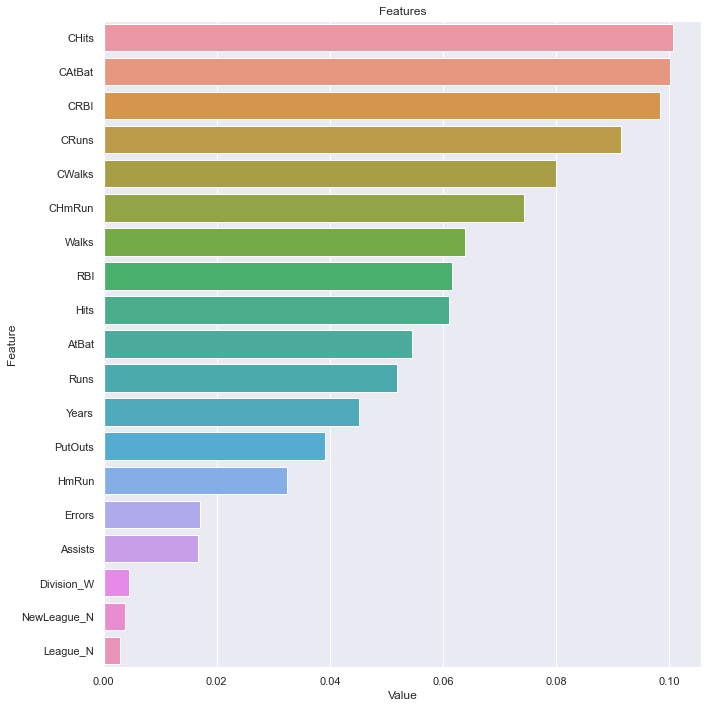

In [119]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_final, X)

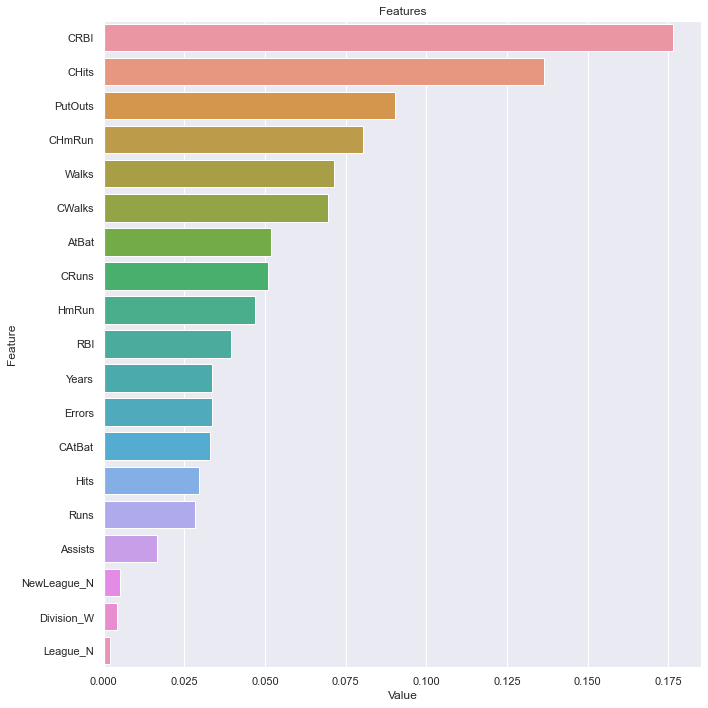

In [120]:
plot_importance(gbm_tuned, X)

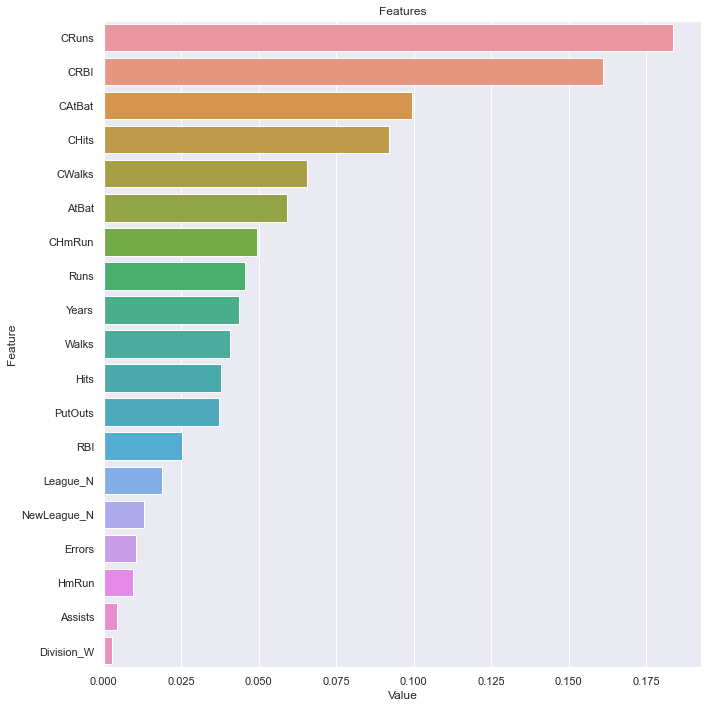

In [121]:
plot_importance(xgb_tuned, X)

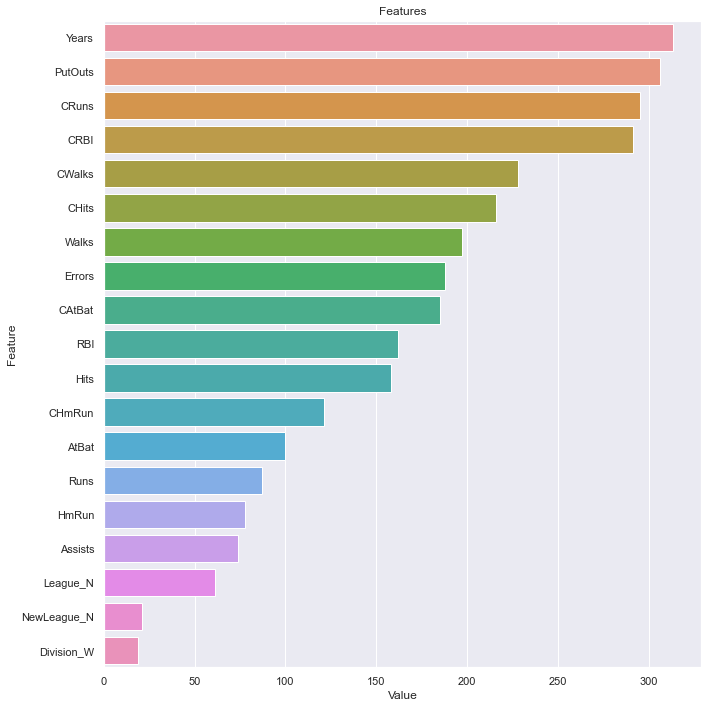

In [122]:
plot_importance(lgbm_tuned, X)

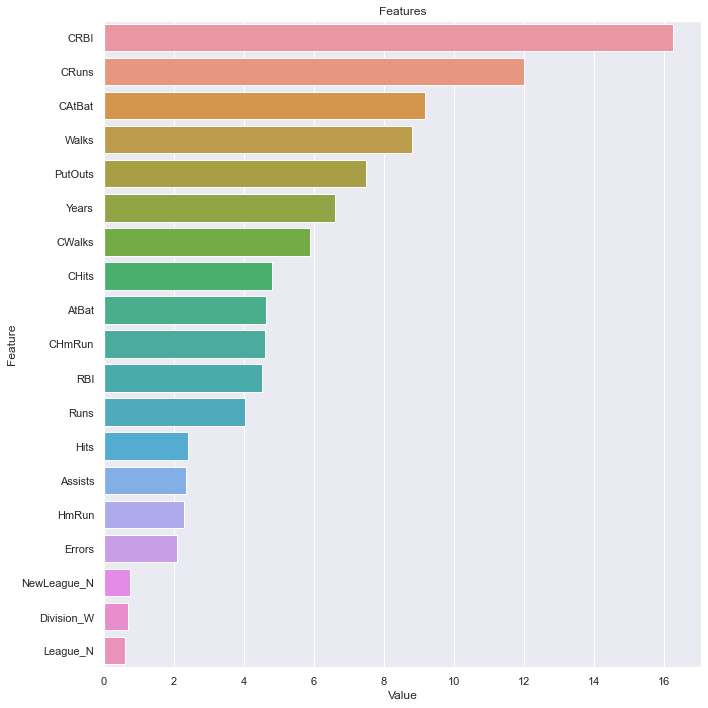

In [123]:
plot_importance(catb_tuned, X)